# Simple logistic regression

### Loading the data

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://raw.githubusercontent.com/jnin/information-systems/main/data/AdvertisingLog.csv')
data

,TV,radio,newspaper,success
0,230.1,37.8,69.2,1
1,44.5,39.3,45.1,0
2,17.2,45.9,69.3,0
3,151.5,41.3,58.5,1
4,180.8,10.8,58.4,1
...,...,...,...,...
195,38.2,3.7,13.8,0
196,94.2,4.9,8.1,0
197,177.0,9.3,6.4,1
198,283.6,42.0,66.2,0


In [17]:
X = data['TV']
y = data.iloc[:, -1]

### Defining the model

Remember that a logistic regression model is defined as follows

$$ \hat{p} = P(\hat{Y} = 1) = \frac{1}{1+ e^{-(\hat{\beta_0} + \hat{\beta_1} X_1)}} $$

To avoid to repeat the previous task of finding the optimal betas. $\beta_0$ and $\beta_1$ have been already calculated. Run the cell below to store their values.

In [18]:
b0 = -3.86734214
b1 = 0.02196707

### Odds Computation

Let's use this values to compute the log odds. Log odds have a linear relationship with the independent variable $X_1$ defined by the equation

$$
log\frac{\hat{p}}{1 - \hat{p}} = \hat\beta_0 + \hat\beta_1 X_1
$$

In [24]:
log_odds = b0 + b1 * X

### Making predictions

We want to compute the probability of success for a marketing campaign depending on the each invested budget $X_{i1}$. First, we have to define a function to compute $\hat{p}$ given $X_1$, remember that
$$ \hat{p} = P(\hat{Y} = 1) = \frac{1}{1+ e^{-(\hat{\beta_0} + \hat{\beta_1} X)}} $$


In [38]:
def regression_model(b0, b1, X):
    return 1 / (1 + np.exp(-log_odds))

In [39]:
prob_pred = regression_model(b0, b1, X)

Remember that in order to obtain predictions using your logistic model, you need to fix a threshold to go from probabilities to classes:

if $\hat p >$ threshold then Y = 1 (Prediction=Success) \
if $\hat p \leq$ threshold then Y = 0 (Prediction=Fail) 

In [40]:
def probabilities_to_predictions(probs, prob_threshold):
    threshold = prob_threshold
    predictions = []
    for p in probs:
        if p > threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Finally use this function to obtain label predictions for all the sample susing a threshold equal to 0.5. Store the resulting values in a variable called ```y_pred```.

In [42]:
threshold = 0.5
y_pred = probabilities_to_predictions(prob_pred, threshold)

[1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1]

### Evaluating the model

Of course, if we change the threshold we will achieve different values for the accuracy metric. However, this is out of the scope of this session, so we will only compute the accuracy for threshold = 0.5

Remember that the accuracy metric is defined as 

$$ \text{accuracy} = \frac {\text{cp}}{\text{tp}} $$

where **cp** and **tp** stand for correct predictions and the total number of predictions respectively.

In [44]:
accuracy = sum(y==y_pred)/len(y_pred)
accuracy

0.845

### Plotting results

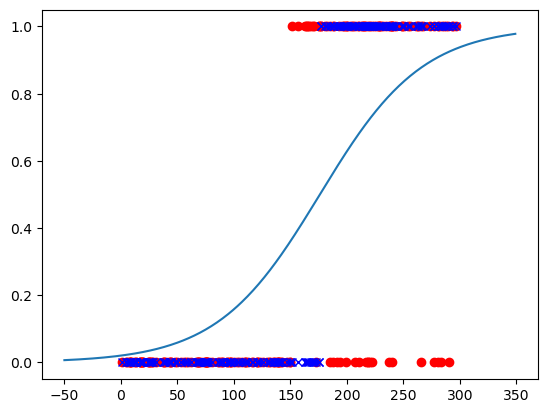

In [14]:
import matplotlib.pyplot as plt
X_plot = np.arange(-50, 350)
y_plot = regression_model(b0, b1, X_plot)
plt.plot(X_plot, y_plot)
plt.plot(X, y, "ro")
plt.plot(X, y_pred, "bx")